# Segemntation with K-Means

# Necessary Imports

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2

# Resize Images

In [53]:
# Resize images to 64x64
def resize_images(images):
    resized_images = []
    for img in images:
        img = cv2.resize(img, (64, 64))
        resized_images.append(img)
    return resized_images

# Load Images

In [54]:
# Load images from a directory
def load_imgs(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        images.append(img)
    return images

# Visualizing Original Images

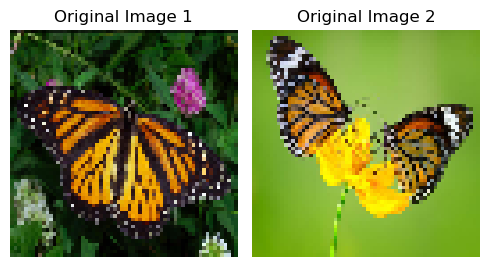

In [55]:
# Loading and Visualising Images
images = load_imgs('images')
resized_images = resize_images(images)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(5, 4))

# Plot resized images in subplots
for i, ax in enumerate(axes):
    ax.imshow(resized_images[i])
    ax.set_title(f'Original Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Flattening Pixels of Image 1 and Image 2

In [56]:
# Flatten Each channel of the Image
all_pixels = resized_images[0].reshape((-1, 3))
all_pixels2 = resized_images[1].reshape((-1, 3))
all_pixels = np.float32(all_pixels)
all_pixels2 = np.float32(all_pixels2)
print(all_pixels.shape)
print(all_pixels2.shape)

(4096, 3)
(4096, 3)


# Number of Clusters (K) = 3

**Finding the centres**

In [57]:
# KMeans Clustering with 3 clusters
k = 3
km = KMeans(n_clusters=k)
km.fit(all_pixels)
centers = km.cluster_centers_
centers = np.uint8(centers)
print(centers)


[[ 54  78  36]
 [199 146  57]
 [ 17  26  12]]


In [58]:
segmented_img = np.zeros((64*64,3),dtype='uint8')
print(km.labels_)
print(segmented_img.shape)
print(km.labels_.shape)

[2 2 0 ... 1 2 2]
(4096, 3)
(4096,)


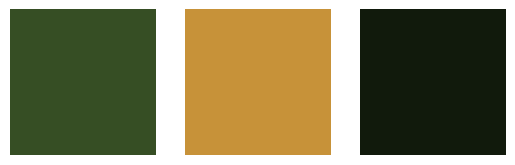

In [59]:
# Assigning each pixel the color of its corresponding cluster center
colors = []
i = 1
# Display the colors of the clusters
for each_centre_col in centers:
    plt.subplot(1,k,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_centre_col)
    
    # Color Swatch
    a = np.zeros((64,64,3),dtype='uint8')
    a[:,:,:] = each_centre_col
    plt.imshow(a)
    
plt.show()

**Segmented Image 1**

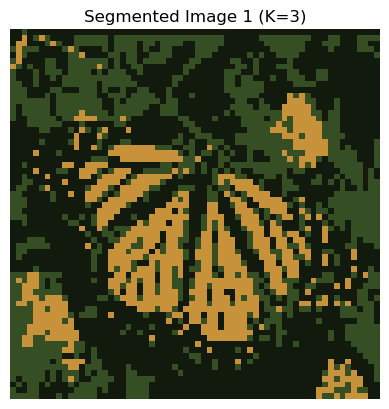

In [60]:
# Assigning each pixel to its respective cluster
for ix in range(segmented_img.shape[0]):
    segmented_img[ix] = colors[km.labels_[ix]]
    
new_img = segmented_img.reshape((64,64,3))
plt.imshow(new_img)
plt.title(f'Segmented Image 1 (K={k})')
plt.axis('off')
plt.show()

**Segmented Image 2**

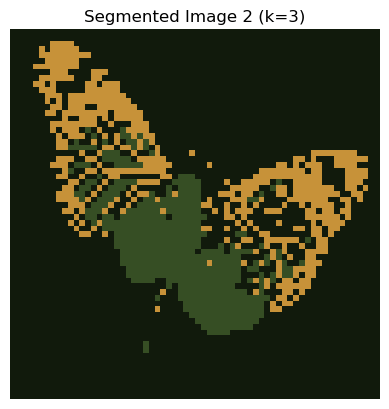

In [61]:
# Second Image
k = 3
km = KMeans(n_clusters=k)
km.fit(all_pixels2)
centers = km.cluster_centers_
centers = np.uint8(centers)
segmented_img2 = np.zeros((64*64,3),dtype='uint8')

for ix in range(segmented_img2.shape[0]):
    segmented_img2[ix] = colors[km.labels_[ix]]
    
new_img = segmented_img2.reshape((64,64,3))
plt.axis('off')
plt.title(f'Segmented Image 2 (k={k})')
plt.imshow(new_img)
plt.show()

# Number of Clusters (K) = 6

In [62]:
# KMeans Clustering with 6 clusters
k = 6
km = KMeans(n_clusters=k)
km.fit(all_pixels)
centers_six = km.cluster_centers_
centers_six = np.uint8(centers_six)
print(centers_six)

[[ 98  97  76]
 [ 17  22  11]
 [229 160  14]
 [173 159 155]
 [163  80  11]
 [ 38  73  27]]


In [63]:
segmented_img_6 = np.zeros((64*64,3),dtype='uint8')

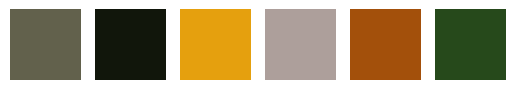

In [64]:
# Assigning each pixel to its respective cluster
colors_six = []
i = 1
# Display the colors of the clusters
for each_centre_col in centers_six:
    plt.subplot(1,k,i)
    plt.axis("off")
    i+=1
    
    colors_six.append(each_centre_col)
    
    # Color Swatch
    a = np.zeros((64,64,3),dtype='uint8')
    a[:,:,:] = each_centre_col
    plt.imshow(a)
    
plt.show()

**Segmented Image 1**

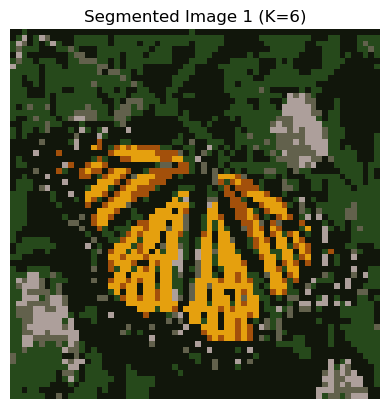

In [65]:
# Assigning the colors to the segmented image
for ix in range(segmented_img_6.shape[0]):
    segmented_img_6[ix] = colors_six[km.labels_[ix]]

new_img = segmented_img_6.reshape((64,64,3))

# Display the segmented image
plt.imshow(new_img)
plt.title(f'Segmented Image 1 (K={k})')
plt.axis('off')
plt.show()

**Segmented Image 2**

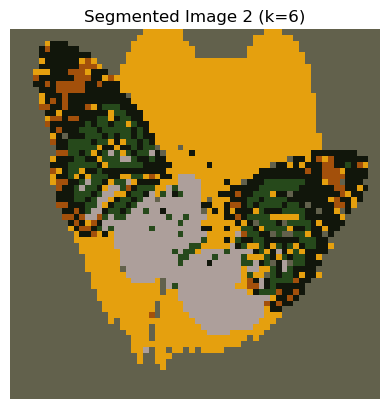

In [66]:
# Image 2
k = 6
km = KMeans(n_clusters=k)
km.fit(all_pixels2)
centers_six = km.cluster_centers_
centers_six = np.uint8(centers)
segmented_img2_6 = np.zeros((64*64,3),dtype='uint8')

for ix in range(segmented_img2_6.shape[0]):
    segmented_img2_6[ix] = colors_six[km.labels_[ix]]
    
new_img = segmented_img2_6.reshape((64,64,3))
plt.axis('off')
plt.title(f'Segmented Image 2 (k={k})')
plt.imshow(new_img)
plt.show()

# Segmentation with Ratio Cut (Spectral Clustering)

In [69]:
# Convert RGB images to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def spectral_clustering(img, k, sigma=9):
    # Flatten the image
    img_flat = img.flatten()

    # Compute pairwise distance matrix
    n = len(img_flat)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = np.linalg.norm(img_flat[i] - img_flat[j])

    # Compute affinity matrix
    affinity_matrix = np.exp(-distance_matrix ** 2 / (2. * sigma ** 2))

    # Compute degree matrix
    degree_matrix = np.diag(np.sum(affinity_matrix, axis=1))

    # Compute Laplacian matrix
    laplacian_matrix = degree_matrix - affinity_matrix

    # Compute the first k eigenvectors of the Laplacian matrix
    eig_values, eig_vectors = np.linalg.eigh(laplacian_matrix)

    # Select the k eigenvectors corresponding to the smallest eigenvalues
    smallest_indices = np.argsort(eig_values)[:k]
    eig_vectors = eig_vectors[:, smallest_indices]

    # Perform k-means clustering on the selected eigenvectors
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(eig_vectors)

    # Reshape labels into image shape
    segmented_img = labels.reshape(img.shape)

    return segmented_img


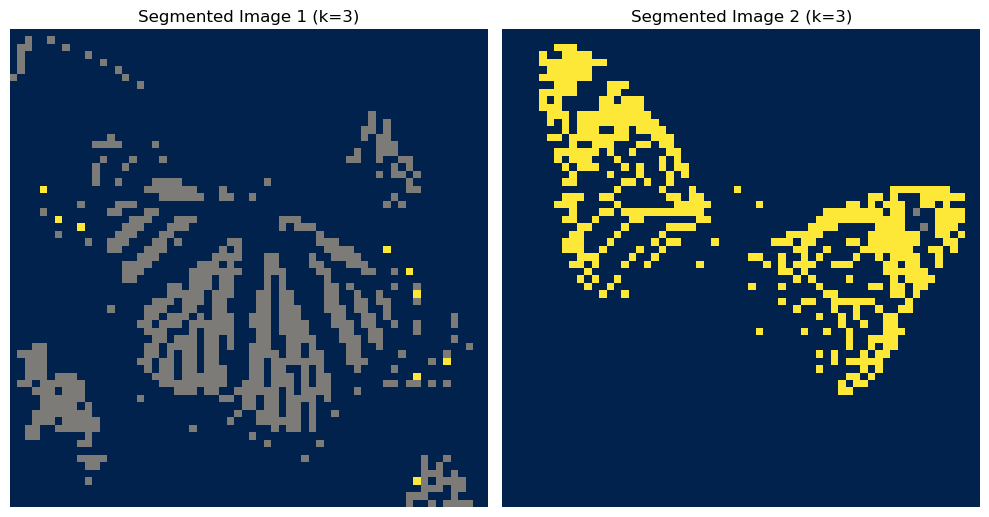

In [70]:
# Perform Spectral Clustering on each image
# Load and resize images
images = load_imgs('images')
resized_images = resize_images(images)

# Convert images to grayscale
gray_images = [rgb2gray(img) for img in resized_images]
k = 3  # Number of clusters
segmented_images = [spectral_clustering(img, k) for img in gray_images]
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Plot segmented images in subplots
for i, ax in enumerate(axes):
    ax.imshow(segmented_images[i], cmap='cividis')
    ax.set_title(f'Segmented Image {i+1} (k={k})')
    ax.axis('off')

plt.tight_layout()
plt.show()

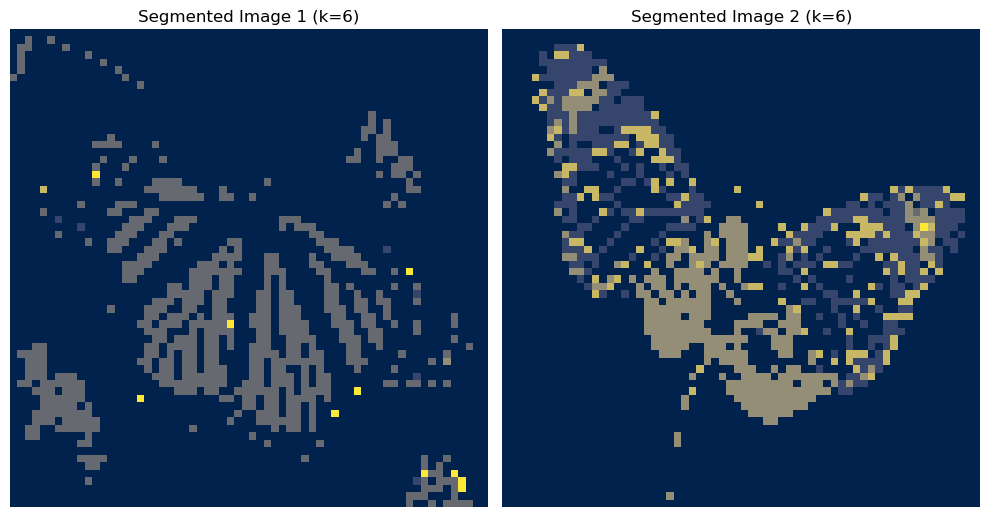

In [71]:
k = 6  # Number of clusters
segmented_images = [spectral_clustering(img, k) for img in gray_images]

# Display segmented images
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Plot segmented images in subplots
for i, ax in enumerate(axes):
    ax.imshow(segmented_images[i], cmap='cividis')
    ax.set_title(f'Segmented Image {i+1} (k={k})')
    ax.axis('off')

plt.tight_layout()
plt.show()
